<a href="https://colab.research.google.com/github/Sohankumar6/Final_Project_MRI/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Model

In [1]:
# Importing libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

# Creating a base directory and defining the path
base_directory_path = '/content/drive/MyDrive/Final project'
testing_path = base_directory_path + '/Testing'
training_path = base_directory_path + '/Training'

def get_images(directory_path):
    count_image_dict = {}
    img_paths = []
    img_labels = []
    for class_img_dir in os.listdir(directory_path):
        class_img_path = os.path.join(directory_path, class_img_dir)
        if os.path.isdir(class_img_path):
            count_image_dict[class_img_dir] = len(os.listdir(class_img_path))
            for img_name in os.listdir(class_img_path):
                img_paths.append(os.path.join(class_img_path, img_name))
                img_labels.append(class_img_dir)
    return count_image_dict, img_paths, img_labels

training_count, training_img_paths, training_label = get_images(training_path)
testing_count, testing_image_paths, testing_label = get_images(testing_path)

# Encode labels
unique_names = list(set(training_label))
class_naming = {label: idx for idx, label in enumerate(unique_names)}
training_label_indx = [class_naming[label] for label in training_label]
testing_label_indx = [class_naming[label] for label in testing_label]

# training_data_df = pd.DataFrame(list(training_count.items()), columns=['Tumor Type', 'Training Count'])
# testing_data_df = pd.DataFrame(list(testing_count.items()), columns=['Tumor Type', 'Testing Count'])

# combined_data_df = pd.merge(training_data_df, testing_data_df, on='Tumor Type')
# combined_data_df.set_index('Tumor Type', inplace=True)

# # Plot bar chart for count of tumors
# axes = combined_data_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Count of tumors in training and testing datasets')
# plt.xlabel('Tumor Type')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# for p in axes.patches:
#     axes.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

# plt.show()

Mounted at /content/drive


In [ ]:
# Load and preprocess images
def preprocess_image(img_path, img_size=(250, 250)):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    return img_array.flatten()  # Flatten the image to a 1D array for KNN

X_train = np.array([preprocess_image(img_path) for img_path in training_img_paths])
y_train = np.array(training_label_indx)

X_test = np.array([preprocess_image(img_path) for img_path in testing_image_paths])
y_test = np.array(testing_label_indx)

Accuracy: 83.8291%


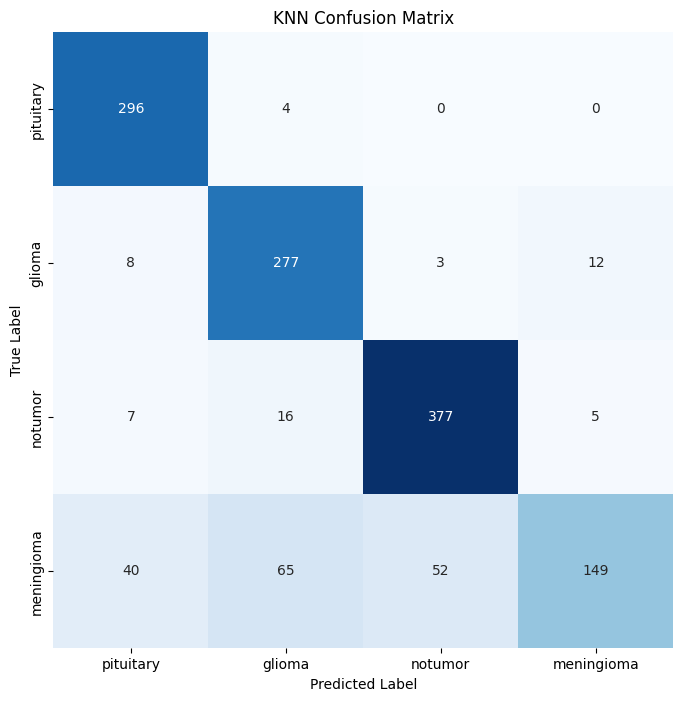

In [ ]:
# Create KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Save the model
joblib.dump(knn_model, '/content/drive/MyDrive/Final project/knn_model.pkl')

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# # Display confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap='Blues', cbar=False, xticklabels=class_naming.keys(), yticklabels=class_naming.keys())
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


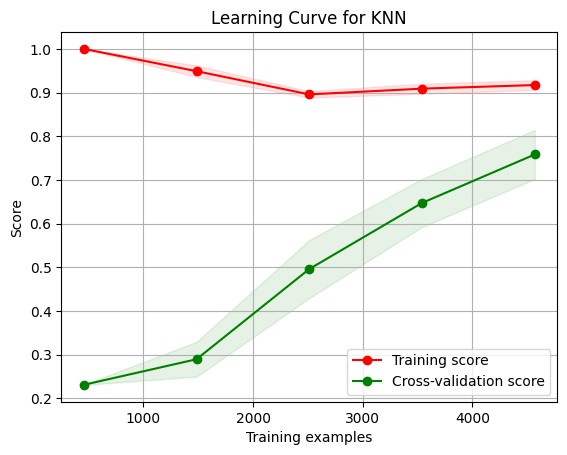

In [ ]:
# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
plot_learning_curve(knn_model, "Learning Curve for KNN", X_train, y_train, cv=5)
plt.show()

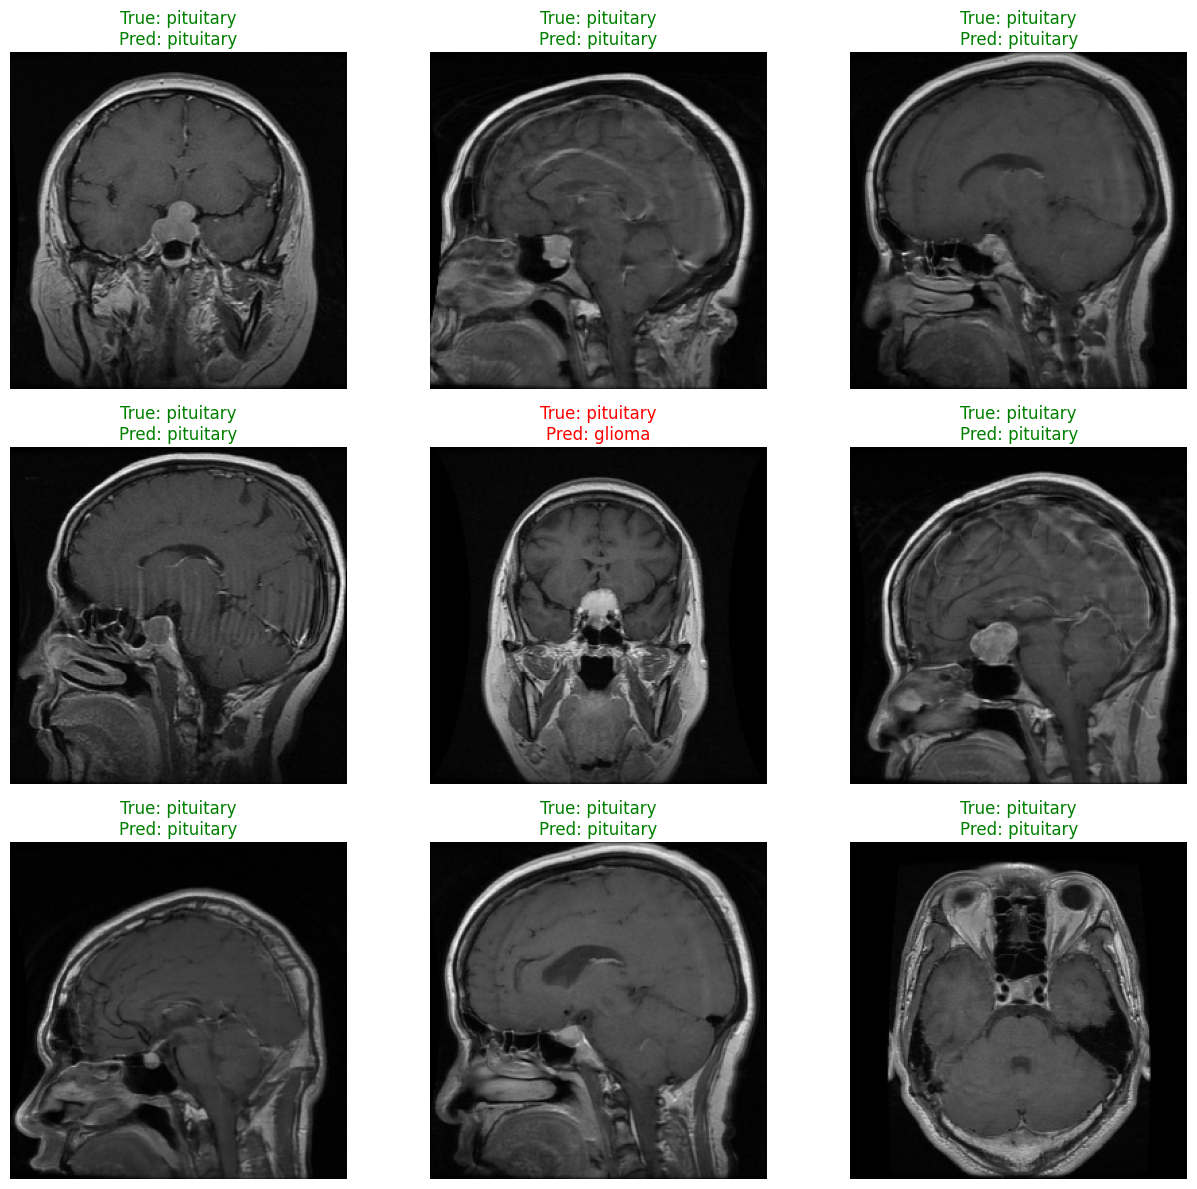

In [ ]:
# Function to predict the tumor type for a new image
def predict_tumor_type_knn(img_path, model, class_naming, img_size=(250, 250)):
    # Preprocess the image
    img_array = preprocess_image(img_path, img_size=img_size).reshape(1, -1)  # Reshape to match the input shape of the model

    # Make the prediction
    prediction = model.predict(img_array)

    # Decode the prediction to get the tumor type
    inv_class_naming = {v: k for k, v in class_naming.items()}
    tumor_type = inv_class_naming[prediction[0]]
    return tumor_type

# Function to plot sample predictions
def plot_sample_predictions_knn(model, img_paths, true_labels, class_naming, num_samples=9, img_size=(250, 250), figsize=(13, 12)):
    plt.figure(figsize=figsize)
    rows = num_cols = int(np.sqrt(num_samples))

    for i in range(num_samples):
        img_path = img_paths[i]
        true_label_idx = true_labels[i]
        true_label = {v: k for k, v in class_naming.items()}[true_label_idx]
        predicted_label = predict_tumor_type_knn(img_path, model, class_naming, img_size=img_size)

        img = load_img(img_path, target_size=img_size)
        plt.subplot(rows, num_cols, i + 1)
        plt.imshow(img)
        title_color = 'green' if true_label == predicted_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
num_samples = 9  # Specify the number of samples to display
plot_sample_predictions_knn(knn_model, testing_image_paths[:num_samples], y_test[:num_samples], class_naming, num_samples=num_samples)


In [ ]:

# Check if GPU is available
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#     raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
